<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

* Importation de la librairie Pandas

In [294]:
import pandas as pd

* Importation de la librairie NumPy 

In [295]:
import numpy as  np

* Importation de la librairie Matplotlib.pyplot

In [296]:
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

* Importation du fichier population.csv



In [297]:
population = pd.read_csv('population.csv')

In [298]:
type(population)

pandas.core.frame.DataFrame

* Importation du fichier dispo_alimentaire.csv

In [299]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

In [300]:
type(dispo_alimentaire)

pandas.core.frame.DataFrame

* Importation du fichier aide_alimentaire.csv

In [301]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [302]:
type(aide_alimentaire)

pandas.core.frame.DataFrame

* Importation du fichier sous_nutrition.csv

In [303]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')

In [304]:
type(sous_nutrition)

pandas.core.frame.DataFrame

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

* Afficher les dimensions du dataset

In [305]:
print("Le tableau population comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(population.shape[1]))

Le tableau population comporte 1416 observation(s) ou article(s)
Le tableau population comporte 3 colonne(s)


In [306]:
population.shape

(1416, 3)

* Consulter le nombre de colonnes 


In [307]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


* La nature des données dans chacune des colonnes


In [308]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

* Le nombre de valeurs présentes dans chacune des colonnes

In [309]:
population.count()

Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [310]:
population.nunique()

Zone       236
Année        6
Valeur    1413
dtype: int64

* Affichage les 5 premières lignes de la table

In [311]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


* Nous allons harmoniser les unités.Pour cela, nous avons décidé de multiplier la population par 1000



* Multiplication de la colonne valeur par 1000

In [312]:
population['Valeur']=population['Valeur']*1000

* changement du nom de la colonne Valeur par Population

In [313]:
population.rename(columns={"Valeur":"Pop"},inplace=True)

* Affichage les 5 premières lignes de la table pour voir les modifications

In [314]:
population.head()

,Zone,Année,Pop
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

* Afficher les dimensions du dataset

In [315]:
print("Le tableau dispo_alimentaire comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau dispo_alimentaire comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau dispo_alimentaire comporte 15605 observation(s) ou article(s)
Le tableau dispo_alimentaire comporte 18 colonne(s)


* Consulter le nombre de colonnes

In [316]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

* Affichage les 5 premières lignes de la table

In [317]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


* Remplacement des NaN dans le dataset par des 0

In [318]:
dispo_alimentaire.fillna(0, inplace=True)

In [319]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


* Multiplication de toutes les lignes contenant des milliers de tonnes en Kg

In [320]:
conversion_tonnes_kg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for x in conversion_tonnes_kg:
    dispo_alimentaire[x] *= 1000000


* Affichage les 5 premières lignes de la table

In [321]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

* Afficher les dimensions du dataset

In [322]:
print("Le tableau aide_alimentaire comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau aide_alimentaire comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau aide_alimentaire comporte 1475 observation(s) ou article(s)
Le tableau aide_alimentaire comporte 4 colonne(s)


* Consulter le nombre de colonnes


In [323]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


* Affichage les 5 premières lignes de la table

In [324]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


* Changement du nom de la colonne Pays bénéficiaire par Zone et Valeur par quantiteReçu

In [325]:
aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone","Valeur":"quantiteReçu"},inplace=True)

* Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

In [326]:
aide_alimentaire['quantiteReçu']=aide_alimentaire['quantiteReçu']*1000

* Affichage les 5 premières lignes de la table


In [327]:
aide_alimentaire.head()

,Zone,Année,Produit,quantiteReçu
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [328]:
aide_alimentaire.dtypes

Zone            object
Année            int64
Produit         object
quantiteReçu     int64
dtype: object

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

* Afficher les dimensions du dataset

In [329]:
print("Le tableau sous_nutrition comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau sous_nutrition comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau sous_nutrition comporte 1218 observation(s) ou article(s)
Le tableau sous_nutrition comporte 3 colonne(s)


* Consulter le nombre de colonnes

In [330]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


* Afficher les 5 premières lignes de la table

In [331]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


* Vérification des types de nos variables

In [332]:
sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

* Conversion de la colonne sous nutrition en numérique avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)


In [333]:
sous_nutrition['Valeur']=pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

* Remplacement des NaN en 0

In [334]:
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)


* Changement du nom de la colonne Valeur par sous_nutrition

In [335]:
sous_nutrition.rename(columns={"Valeur":"popSNut"},inplace=True)

* Multiplication de la colonne sous_nutrition par 1000000

In [336]:
sous_nutrition['popSNut']=sous_nutrition['popSNut']*1000000

* Afficher les 5 premières lignes de la table

In [337]:
sous_nutrition.head()

,Zone,Année,popSNut
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


  * Remplacement des intervalles d'année en leur moyenne. 
    Exemple la valeur '2012-2014' est remplacée par sa moyenne : '2013'

In [338]:
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2012-2014', '2013')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2013-2015', '2014')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2014-2016', '2015')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2015-2017', '2016')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2016-2018', '2017')
sous_nutrition['Année'] = sous_nutrition['Année'].str.replace('2017-2019', '2018')

* Afficher les 5 premières lignes de la table

In [339]:
sous_nutrition.head()

,Zone,Année,popSNut
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyses réalisées</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

* Changement du type de la serie Année dans le dataframe sous_nutrition

In [340]:
sous_nutrition['Année'] = sous_nutrition['Année'].astype(np.int64)
sous_nutrition.dtypes

Zone        object
Année        int64
popSNut    float64
dtype: object

* Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

In [341]:
df_popSN17 = pd.merge(population.loc[population['Année'] == 2017], sous_nutrition.loc[sous_nutrition['Année'] == 2017], on=['Zone','Année'])

* Affichage du dataset

In [435]:
df_popSN17

,Zone,Année,Pop,popSNut,Proportion_par_pays
0,Afghanistan,2017,36296113.0,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,3100000.0,5.44
2,Albanie,2017,2884169.0,100000.0,3.47
3,Algérie,2017,41389189.0,1300000.0,3.14
4,Allemagne,2017,82658409.0,0.0,0.00
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0,27.21
199,Viet Nam,2017,94600648.0,6500000.0,6.87
200,Yémen,2017,27834819.0,0.0,0.00
201,Zambie,2017,16853599.0,0.0,0.00


In [343]:
print("La population mondiale en 2017 est de: {:.0f} personnes".format(df_popSN17['Pop'].sum()))

La population mondiale en 2017 est de: 7543798779 personnes


In [344]:
print("La population totale en état de sous nutrition en 2017 est de: {:.0f} personnes".format(df_popSN17['popSNut'].sum()))

La population totale en état de sous nutrition en 2017 est de: 535700000 personnes


* Calcul et affichage du nombre de personnes en état de sous nutrition

In [345]:
print("La population mondiale en 2017 est de: {:.0f} personnes".format(df_popSN17['Pop'].sum()))

La population mondiale en 2017 est de: 7543798779 personnes


In [346]:
print("La population totale en état de sous nutrition en 2017 est de: {:.0f} personnes".format(df_popSN17['popSNut'].sum()))

La population totale en état de sous nutrition en 2017 est de: 535700000 personnes


In [347]:
print("La proportion des personnes en état de sous-nutrition est de: {:.2f}%".format(df_popSN17['popSNut'].sum()/df_popSN17['Pop'].sum()*100))

La proportion des personnes en état de sous-nutrition est de: 7.10%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

* Combien mange en moyenne un être humain ? Source => 

Un etre humain besoin en moyenne de 2500 calories par jour
selon l'Organisation mondiale de la santé (OMS). Une estimation générale basée sur les besoins énergétiques moyens d'un homme adulte.

* On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

In [348]:
 dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [349]:
df_popDA17 = pd.merge(population.loc[population['Année'] == 2017], dispo_alimentaire, on='Zone')

* Affichage du nouveau dataframe

In [436]:
df_popDA17

,Zone,Année,Pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,6.624041e+10
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0,1.247126e+11
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0,8.833807e+10
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,...,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0,3.637450e+10
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0,5.196357e+09


* Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

In [351]:
pd.options.mode.chained_assignment = None  # default='warn'

In [352]:
df_popDA17['Dispo_kcal'] = df_popDA17['Disponibilité alimentaire (Kcal/personne/jour)'] * df_popDA17['Pop']*365

In [353]:
df_popDA17.head()

,Zone,Année,Pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,6.624041e+10
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10


In [354]:
print("La disponibilité alimentaire en kcal mondiale est de: {:.1f} kcal".format(df_popDA17['Dispo_kcal'].sum()))

La disponibilité alimentaire en kcal mondiale est de: 7635429388975815.0 kcal


* Calcul du nombre d'humains pouvant être nourris

In [355]:
Total_kcal=round(df_popDA17['Dispo_kcal'].sum()/(2500*365))
print("Total d'humains pouvant etre nourris est de :", Total_kcal)

Total d'humains pouvant etre nourris est de : 8367593851


In [356]:
print("La proportion d'humains pouvant etre nourris est de :", "{:.2f}".format(Total_kcal*100/population.loc[population['Année']==2017, "Pop"].sum()), "%")

La proportion d'humains pouvant etre nourris est de : 110.86 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

* Transfert des données avec les végétaux dans un nouveau dataframe


In [357]:
df_popDA17V = df_popDA17.loc[(df_popDA17['Origine'] == 'vegetale')]

In [358]:
df_popDA17V.head()

,Zone,Année,Pop,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Dispo_kcal
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


* Calcul du nombre d'humains pouvant être nourris avec les végétaux

In [359]:
df_popDA17V['Dispo_kcalV']=df_popDA17V['Disponibilité alimentaire (Kcal/personne/jour)']*df_popDA17V['Pop']*365
print("La disponibilité alimentaire en kcal mondiale des produits végétaux est de: {:.1f} kcal".format(df_popDA17V['Dispo_kcalV'].sum()))

La disponibilité alimentaire en kcal mondiale des produits végétaux est de: 6300178937197865.0 kcal


In [360]:
Total_kcalV=round(df_popDA17V['Dispo_kcalV'].sum()/(2500*365))
print("Total d'humains pouvant etre nourris avec les végétaux est de:", Total_kcalV)

Total d'humains pouvant etre nourris avec les végétaux est de: 6904305685


In [361]:
print("La proportion d'humains pouvant etre nourris avec les végétaux est de:", "{:.2f}".format(Total_kcalV*100/population.loc[population['Année']==2017, "Pop"].sum()), "%")

La proportion d'humains pouvant etre nourris avec les végétaux est de: 91.47 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

Disponibilité intérieure = Production + Variation de stock + Importation - Exportation.

* Calcul de la disponibilité totale

In [362]:
dispo_int_totale = df_popDA17['Disponibilité intérieure'].sum()
print("La disponibilité intérieure totale est de:", dispo_int_totale)

La disponibilité intérieure totale est de: 9733927000000.0


* Création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 

On va procéder par le calcul de la part en pourcentage de la disponibilité alimentaire des produits aliments pour animaux, pertes, nourritures par rapport à la disponibilité intérieure totale.

In [363]:
colonnes=['Aliments pour animaux', 'Pertes', 'Nourriture']
for x in colonnes:
    print("Proportion de", x, ":", "{:.2f}".format(dispo_alimentaire[x].sum()*100/dispo_int_totale), "%")

Proportion de Aliments pour animaux : 13.40 %
Proportion de Pertes : 4.66 %
Proportion de Nourriture : 50.10 %


* Création d'une boucle for pour afficher le pourcentage de la disponibilité alimentaire des produits aliments pour animaux, pertes, nourritures,semences,traitement,autres utilisations par rapport à la disponibilité intérieure totale.

In [364]:
colonnes=['Aliments pour animaux', 'Pertes', 'Nourriture','Semences','Traitement','Autres Utilisations']
for x in colonnes:
    print(" proportion de", x, ":", "{:.2f}".format(dispo_alimentaire[x].sum()*100/dispo_int_totale), "%")

 proportion de Aliments pour animaux : 13.40 %
 proportion de Pertes : 4.66 %
 proportion de Nourriture : 50.10 %
 proportion de Semences : 1.59 %
 proportion de Traitement : 22.65 %
 proportion de Autres Utilisations : 8.89 %


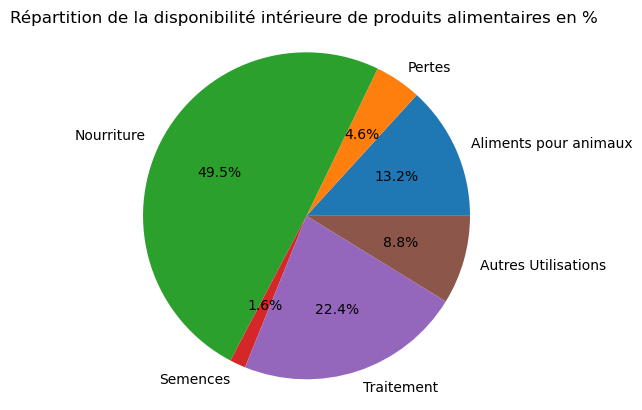

In [365]:
colonnes=['Aliments pour animaux', 'Pertes', 'Nourriture','Semences','Traitement','Autres Utilisations']
proportions = []
for x in colonnes:
    proportion = dispo_alimentaire[x].sum() * 100 / dispo_int_totale
    proportions.append(proportion)


plt.pie(proportions, labels=colonnes, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Répartition de la disponibilité intérieure de produits alimentaires en %')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

* Création d'une liste avec toutes les variables

In [366]:
liste_cereales = ['Blé','Riz (Eq Blanchi)', 'Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales', 'Autres']

* Création d'un dataframe avec les informations uniquement pour ces céréales

In [367]:
df_cereales=dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereales),:]

In [368]:
df_cereales.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.000000e+00,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.000000e+00,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-3.500000e+08
32,Afghanistan,Maïs,vegetale,2.000000e+08,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.000000e+00,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.000000e+00
34,Afghanistan,Millet,vegetale,0.000000e+00,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.000000e+00,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.000000e+00
40,Afghanistan,Orge,vegetale,3.600000e+08,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.000000e+00,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.000000e+00
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.000000e+00,0.0,141.0,13.82,0.27,2.70,4.610000e+08,0.000000e+00,1.190000e+08,4.220000e+08,24000000.0,3.420000e+08,14000000.0,0.0,0.000000e+00
67,Afrique du Sud,Avoine,vegetale,8.000000e+06,0.0,5.0,0.75,0.09,0.16,4.900000e+07,4.000000e+06,2.500000e+07,4.000000e+07,1000000.0,2.800000e+07,1000000.0,0.0,0.000000e+00
72,Afrique du Sud,Blé,vegetale,3.700000e+07,0.0,492.0,60.13,2.09,15.40,3.316000e+09,4.950000e+08,1.490000e+09,3.174000e+09,74000000.0,1.870000e+09,31000000.0,0.0,4.500000e+08
111,Afrique du Sud,Maïs,vegetale,4.715000e+09,0.0,858.0,100.10,7.69,21.91,1.048000e+10,3.036000e+09,5.600000e+07,5.283000e+09,405000000.0,1.181100e+10,33000000.0,43000000.0,1.650000e+09
113,Afrique du Sud,Millet,vegetale,8.000000e+06,0.0,1.0,0.09,0.01,0.02,1.300000e+07,0.000000e+00,7.000000e+06,5.000000e+06,0.0,7.000000e+06,0.0,0.0,0.000000e+00
121,Afrique du Sud,Orge,vegetale,1.900000e+07,0.0,1.0,0.09,0.00,0.01,5.090000e+08,8.000000e+06,1.990000e+08,5.000000e+06,7000000.0,2.680000e+08,6000000.0,472000000.0,5.000000e+07


* Affichage de la proportion d'alimentation animale

In [369]:
print("La proportion d'alimentation animale est de :", "{:.0f}".format(df_cereales['Aliments pour animaux'].sum()*100/df_cereales['Disponibilité intérieure'].sum()), "%")

La proportion d'alimentation animale est de : 36 %


* Affichage de la proportion d'alimentation humaine

In [370]:
print("La proportion d'alimentation humaine est de :", "{:.0f}".format(df_cereales['Nourriture'].sum()*100/df_cereales['Disponibilité intérieure'].sum()), "%")

La proportion d'alimentation humaine est de : 43 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

* Création de la colonne proportion par pays

In [371]:
df_popSN17.head()

,Zone,Année,Pop,popSNut
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [372]:
df_popSN17['Proportion_par_pays']=round(df_popSN17['popSNut']/df_popSN17['Pop']*100,2)
df_popSN17.head()

,Zone,Année,Pop,popSNut,Proportion_par_pays
0,Afghanistan,2017,36296113.0,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,3100000.0,5.44
2,Albanie,2017,2884169.0,100000.0,3.47
3,Algérie,2017,41389189.0,1300000.0,3.14
4,Allemagne,2017,82658409.0,0.0,0.00


* Affichage après trie des 10 pires pays

In [373]:
df_popSN17_max = df_popSN17.sort_values('Proportion_par_pays',ascending=False).head(10)
df_popSN17_max

,Zone,Année,Pop,popSNut,Proportion_par_pays
78,Haïti,2017,10982366.0,5300000.0,48.26
157,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
108,Madagascar,2017,25570512.0,10500000.0,41.06
103,Libéria,2017,4702226.0,1800000.0,38.28
100,Lesotho,2017,2091534.0,800000.0,38.25
183,Tchad,2017,15016753.0,5700000.0,37.96
161,Rwanda,2017,11980961.0,4200000.0,35.06
121,Mozambique,2017,28649018.0,9400000.0,32.81
186,Timor-Leste,2017,1243258.0,400000.0,32.17
0,Afghanistan,2017,36296113.0,10500000.0,28.93


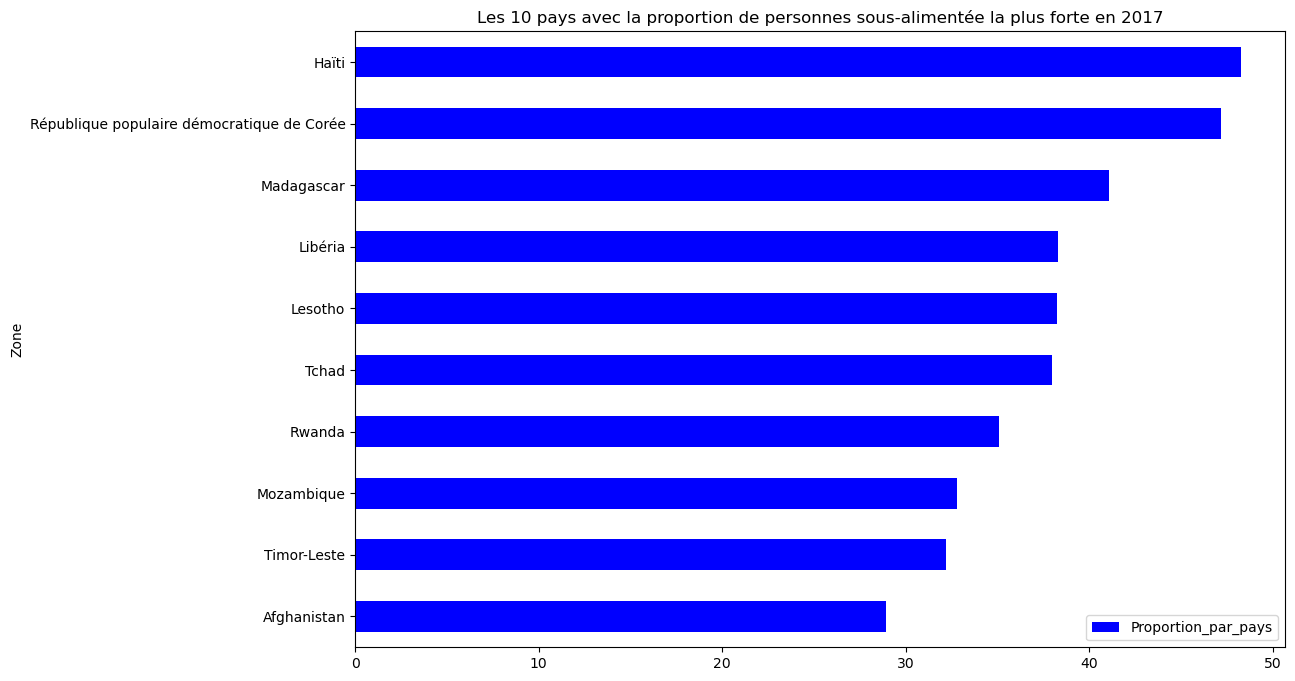

In [374]:
df_popSN17_max.head(10).groupby("Zone")["Proportion_par_pays"].sum().sort_values().plot.barh(color="blue", 
figsize=(12,8), legend=True,title='Les 10 pays avec la proportion de personnes sous-alimentée la plus forte en 2017');

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

* Calcul du total de l'aide alimentaire par pays

In [375]:
aide_alimentaire.head()

,Zone,Année,Produit,quantiteReçu
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [376]:
aide_alim_totale= aide_alimentaire[['Zone','quantiteReçu']].groupby("Zone").sum()
aide_alim_totale.head()

,quantiteReçu
Zone,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000


* Affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

In [377]:
aide_alim_max = aide_alim_totale.sort_values('quantiteReçu',ascending=False)
aide_alim_max.head(10)

,quantiteReçu
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


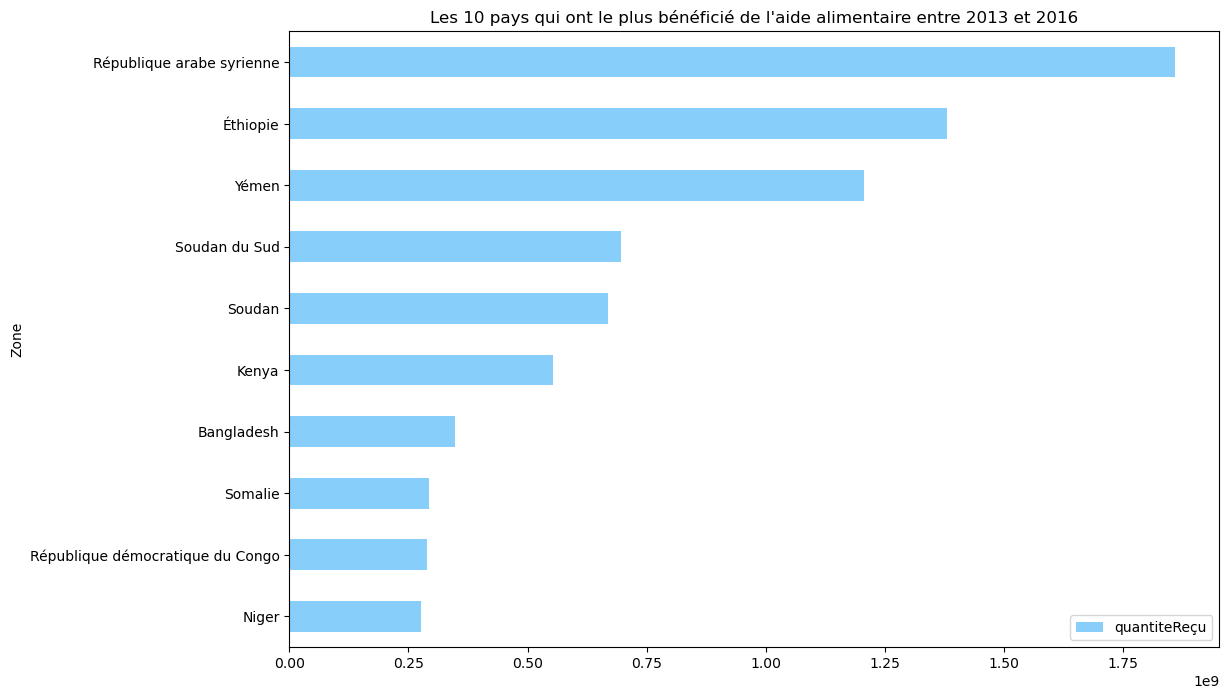

In [378]:
aide_alim_max.head(10).groupby("Zone")["quantiteReçu"].sum().sort_values().plot.barh(
    color="lightskyblue", figsize=(12,8), legend=True,title="Les 10 pays qui ont le plus bénéficié de l'aide alimentaire entre 2013 et 2016");

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

* Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 

In [379]:
aide_alimentaire.head()

,Zone,Année,Produit,quantiteReçu
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [380]:
df_Aide = aide_alimentaire[['Zone', 'Année', 'quantiteReçu']]
df_Aide = df_Aide.groupby(["Zone", "Année"]).sum().reset_index()

In [381]:
df_Aide.head()

,Zone,Année,quantiteReçu
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


* Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

In [382]:
liste_aide5Pays=['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan']

* On filtre sur le dataframe avec notre liste

In [383]:
df_Aide=df_Aide.loc[df_Aide['Zone'].isin(liste_aide5Pays),:]

* Affichage des pays avec l'aide alimentaire par année

In [384]:
df_Aide

,Zone,Année,quantiteReçu
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [385]:
df1 = df_Aide.pivot(index='Zone', columns='Année', values='quantiteReçu') 

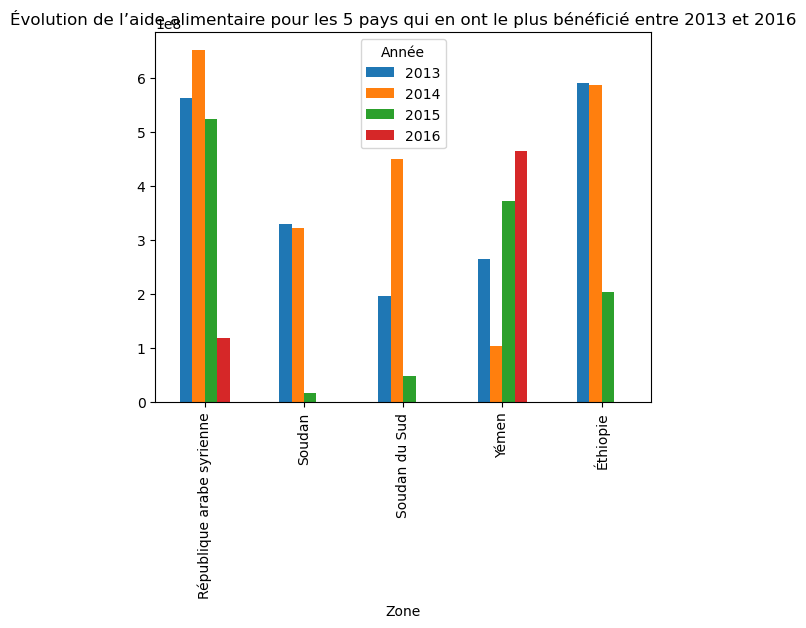

In [386]:
df1.plot.bar(title="Évolution de l’aide alimentaire pour les 5 pays qui en ont le plus bénéficié entre 2013 et 2016")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

* Calcul de la disponibilité en kcal par personne par jour par pays

In [387]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [388]:
dispo_kcal_pers_jr_pays=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby("Zone").sum()

In [389]:
dispo_kcal_pers_jr_pays.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


* Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 

In [390]:
dispo_kcal_pers_jr_pays_min=dispo_kcal_pers_jr_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)
dispo_kcal_pers_jr_pays_min.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


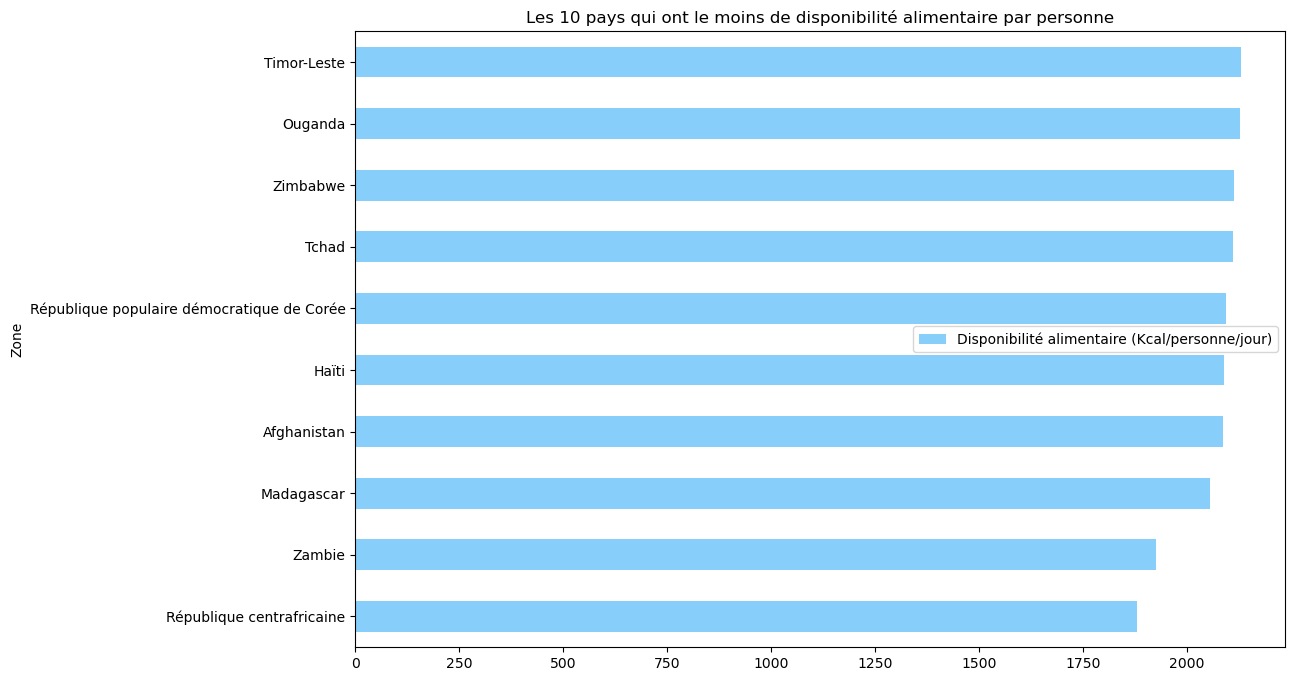

In [391]:
dispo_kcal_pers_jr_pays_min.head(10).groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().sort_values().plot.barh(
 color="lightskyblue", figsize=(12,8), legend=True,title='Les 10 pays qui ont le moins de disponibilité alimentaire par personne');

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

* Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

In [392]:
dispo_kcal_pers_jr_pays_max=dispo_kcal_pers_jr_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)
dispo_kcal_pers_jr_pays_max.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


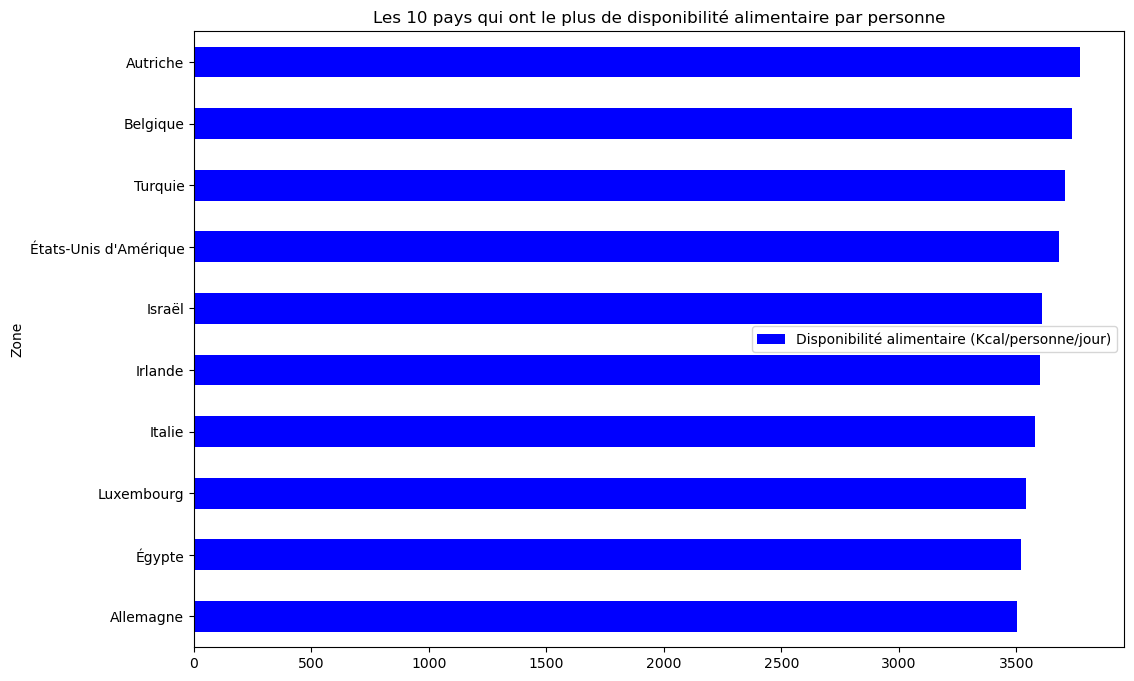

In [393]:
dispo_kcal_pers_jr_pays_max.head(10).groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().sort_values().plot.barh(
    color="blue", figsize=(12,8), legend=True,title='Les 10 pays qui ont le plus de disponibilité alimentaire par personne');

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

* Création d'un dataframe avec uniquement la Thaïlande

In [394]:
df_Thaïlande=sous_nutrition.loc[sous_nutrition['Zone']=='Thaïlande',:]

In [395]:
df_Thaïlande.head()

,Zone,Année,popSNut
1110,Thaïlande,2013,6200000.0
1111,Thaïlande,2014,6000000.0
1112,Thaïlande,2015,5900000.0
1113,Thaïlande,2016,6000000.0
1114,Thaïlande,2017,6200000.0


In [396]:
print("La population totale en état de sous nutrition en 2017 en Thaïlande est de: {:.0f} personnes".format(df_Thaïlande['popSNut'].sum()))

La population totale en état de sous nutrition en 2017 en Thaïlande est de: 36800000 personnes


* Calcul de la sous nutrition en Thaïlande

In [397]:
df_Thaïlande1=pd.merge(df_Thaïlande,population,on=['Zone','Année'])
df_Thaïlande1.head()

,Zone,Année,popSNut,Pop
0,Thaïlande,2013,6200000.0,68144518.0
1,Thaïlande,2014,6000000.0,68438746.0
2,Thaïlande,2015,5900000.0,68714511.0
3,Thaïlande,2016,6000000.0,68971308.0
4,Thaïlande,2017,6200000.0,69209810.0


In [398]:
sous_nutrition_Thaïlande = round(df_Thaïlande1['popSNut'].sum() / df_Thaïlande1['Pop'].sum() * 100, 2)
print("La proportion de sous nutrition en Thaïlande est de : {}%".format(sous_nutrition_Thaïlande))

La proportion de sous nutrition en Thaïlande est de : 8.91%


* On calcule la proportion exportée en fonction de la production

In [399]:
dispo_alim_maniocTh= dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande')]
dispo_alim_maniocTh.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [400]:
proportion_exportée =round(dispo_alim_maniocTh['Exportations - Quantité'].sum() / dispo_alim_maniocTh['Production'].sum() * 100 ,2)
print("La proportion de manioc exportée Thaïlande en fonction de la production est de : {}%".format(proportion_exportée))

La proportion de manioc exportée Thaïlande en fonction de la production est de : 83.41%


* Quelle est la disponibilité par habitant pour la Thaïlande

In [401]:
dispo_kcal_pers_jr_Thai = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande', 'Disponibilité alimentaire (Kcal/personne/jour)'].sum()
print("La disponibilité alimentaire par habitant pour la Thaïlande est de : {} calories".format(dispo_kcal_pers_jr_Thai))

La disponibilité alimentaire par habitant pour la Thaïlande est de : 2785.0 calories


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse complémentaires</h2>
</div>

Ajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté au niveau alimentaire"

* Évolution de la population en état de sous-nutrition en Thaïlande

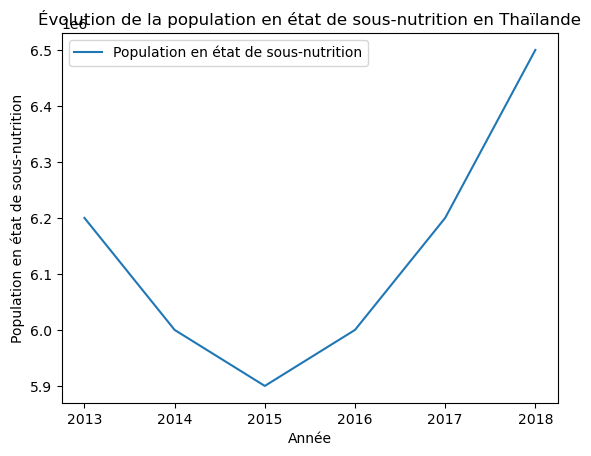

In [402]:
plt.plot(df_Thaïlande['Année'], df_Thaïlande['popSNut'])
plt.title("Évolution de la population en état de sous-nutrition en Thaïlande")
plt.xlabel("Année")
plt.ylabel("Population en état de sous-nutrition")
plt.legend(["Population en état de sous-nutrition"])
plt.show()

* Calcul de la balance commerciale de la Thaïlande en 2017

In [403]:
dispo_alim_Th=df_popDA17.loc[df_popDA17['Zone'] == 'Thaïlande'].groupby('Produit').sum() 

In [404]:
dispo_alim_Th=df_popDA17[['Produit','Année','Pop','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Production']].loc[df_popDA17['Zone'] == 'Thaïlande'].groupby('Produit').sum() 

In [405]:
dispo_alim_Th

,Année,Pop,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Produit,,,,,,,,
Abats Comestible,2017,69209810.0,3.0,74000000.0,5.000000e+06,33000000.0,75000000.0,4.500000e+07
"Agrumes, Autres",2017,69209810.0,0.0,8000000.0,6.000000e+06,2000000.0,6000000.0,1.200000e+07
"Alcool, non Comestible",2017,69209810.0,0.0,358000000.0,1.100000e+08,21000000.0,0.0,4.470000e+08
Aliments pour enfants,2017,69209810.0,2.0,12000000.0,7.000000e+06,19000000.0,12000000.0,0.000000e+00
Ananas,2017,69209810.0,10.0,782000000.0,1.449000e+09,9000000.0,671000000.0,2.209000e+09
...,...,...,...,...,...,...,...,...
Viande de Suides,2017,69209810.0,124.0,871000000.0,2.200000e+07,1000000.0,871000000.0,8.910000e+08
Viande de Volailles,2017,69209810.0,52.0,945000000.0,5.360000e+08,11000000.0,917000000.0,1.470000e+09
"Viande, Autre",2017,69209810.0,0.0,-92000000.0,9.600000e+07,4000000.0,2000000.0,0.000000e+00


In [406]:
balance_commerciale_Thai=dispo_alim_Th['Exportations - Quantité'].sum()-dispo_alim_Th['Importations - Quantité'].sum()
print("La balance commerciale de la Thaïlande en 2017 est de :",balance_commerciale_Thai)

La balance commerciale de la Thaïlande en 2017 est de : 39095000000.0


* Calcul de la proportion de personnes que la Thaïlande peut nourrir avec sa disponibilité intérieure en 2017

In [407]:
population_totale_thai=69209810.0

In [408]:
dispo_int_par_personne=dispo_alim_Th['Disponibilité intérieure'].sum()/population_totale_thai

In [409]:
dispo_int_par_personne

2284.7917079963086

In [410]:
nb_personnes_nourries=dispo_int_par_personne/2500*100
print("La proportion de personnes que la Thaïlande peut nourrir avec sa disponibilité intérieure en 2017 est de: {:.2f} %".format(nb_personnes_nourries))

La proportion de personnes que la Thaïlande peut nourrir avec sa disponibilité intérieure en 2017 est de: 91.39 %


* Liste des 10 produits les plus produits en Thaïlande

In [411]:
poduction_thai_max=dispo_alim_Th.sort_values('Production',ascending=False).head(10)
poduction_thai_max

,Année,Pop,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Produit,,,,,,,,
"Sucre, canne",2017,69209810.0,49.0,1.000960e+11,0.000000e+00,0.000000e+00,4.095000e+09,1.000960e+11
Manioc,2017,69209810.0,40.0,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,3.022800e+10
Riz (Eq Blanchi),2017,69209810.0,1139.0,1.360500e+10,6.860000e+09,5.000000e+07,7.677000e+09,2.405400e+10
Sucre Eq Brut,2017,69209810.0,368.0,2.527000e+09,6.462000e+09,2.500000e+07,2.526000e+09,1.002400e+10
"Fruits, Autres",2017,69209810.0,63.0,3.791000e+09,2.671000e+09,2.610000e+08,3.857000e+09,6.141000e+09
Maïs,2017,69209810.0,95.0,4.678000e+09,5.910000e+08,2.060000e+08,6.810000e+08,5.063000e+09
"Légumes, Autres",2017,69209810.0,36.0,3.557000e+09,4.640000e+08,3.780000e+08,3.207000e+09,3.643000e+09
Bière,2017,69209810.0,41.0,2.040000e+09,2.490000e+08,1.700000e+07,2.040000e+09,2.273000e+09
Ananas,2017,69209810.0,10.0,7.820000e+08,1.449000e+09,9.000000e+06,6.710000e+08,2.209000e+09


* Liste des 10 produits les plus exportés en Thaïlande

In [412]:
export_thai_max=dispo_alim_Th.sort_values('Exportations - Quantité',ascending=False).head(10)

In [413]:
export_thai_max

,Année,Pop,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Produit,,,,,,,,
Manioc,2017,69209810.0,40.0,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,3.022800e+10
Riz (Eq Blanchi),2017,69209810.0,1139.0,1.360500e+10,6.860000e+09,5.000000e+07,7.677000e+09,2.405400e+10
Sucre Eq Brut,2017,69209810.0,368.0,2.527000e+09,6.462000e+09,2.500000e+07,2.526000e+09,1.002400e+10
"Fruits, Autres",2017,69209810.0,63.0,3.791000e+09,2.671000e+09,2.610000e+08,3.857000e+09,6.141000e+09
Ananas,2017,69209810.0,10.0,7.820000e+08,1.449000e+09,9.000000e+06,6.710000e+08,2.209000e+09
Poissons Pelagiques,2017,69209810.0,30.0,6.650000e+08,1.390000e+09,1.460000e+09,6.650000e+08,5.950000e+08
Huile de Palme,2017,69209810.0,67.0,1.367000e+09,7.130000e+08,1.110000e+08,1.870000e+08,1.970000e+09
Crustacés,2017,69209810.0,2.0,9.600000e+07,6.780000e+08,5.500000e+07,9.600000e+07,7.180000e+08
Maïs,2017,69209810.0,95.0,4.678000e+09,5.910000e+08,2.060000e+08,6.810000e+08,5.063000e+09


* Liste des 10 produits les plus importés en Thaïlande

In [414]:
import_thai_max=dispo_alim_Th.sort_values('Importations - Quantité',ascending=False).head(10)

In [415]:
import_thai_max

,Année,Pop,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Produit,,,,,,,,
Blé,2017,69209810.0,76.0,1.882000e+09,2.370000e+08,2.118000e+09,7.330000e+08,2.000000e+06
Soja,2017,69209810.0,22.0,1.860000e+09,1.200000e+07,1.682000e+09,1.430000e+08,1.900000e+08
Poissons Pelagiques,2017,69209810.0,30.0,6.650000e+08,1.390000e+09,1.460000e+09,6.650000e+08,5.950000e+08
Manioc,2017,69209810.0,40.0,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,3.022800e+10
Lait - Excl Beurre,2017,69209810.0,45.0,2.147000e+09,2.000000e+08,1.241000e+09,1.967000e+09,1.095000e+09
"Légumes, Autres",2017,69209810.0,36.0,3.557000e+09,4.640000e+08,3.780000e+08,3.207000e+09,3.643000e+09
Orge,2017,69209810.0,0.0,4.410000e+08,0.000000e+00,3.350000e+08,0.000000e+00,9.500000e+07
"Fruits, Autres",2017,69209810.0,63.0,3.791000e+09,2.671000e+09,2.610000e+08,3.857000e+09,6.141000e+09
Pommes de Terre,2017,69209810.0,8.0,3.420000e+08,4.000000e+06,2.400000e+08,3.260000e+08,1.050000e+08


*  Liste des 10 produits avec la plus forte disponibilité intérieure en Thaïlande

In [416]:
disp_int_par_produitmax=dispo_alim_Th.sort_values('Disponibilité intérieure',ascending=False).head(10)

In [417]:
disp_int_par_produitmax

,Année,Pop,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Produit,,,,,,,,
"Sucre, canne",2017,69209810.0,49.0,1.000960e+11,0.000000e+00,0.000000e+00,4.095000e+09,1.000960e+11
Riz (Eq Blanchi),2017,69209810.0,1139.0,1.360500e+10,6.860000e+09,5.000000e+07,7.677000e+09,2.405400e+10
Manioc,2017,69209810.0,40.0,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,3.022800e+10
Maïs,2017,69209810.0,95.0,4.678000e+09,5.910000e+08,2.060000e+08,6.810000e+08,5.063000e+09
"Fruits, Autres",2017,69209810.0,63.0,3.791000e+09,2.671000e+09,2.610000e+08,3.857000e+09,6.141000e+09
"Légumes, Autres",2017,69209810.0,36.0,3.557000e+09,4.640000e+08,3.780000e+08,3.207000e+09,3.643000e+09
Sucre Eq Brut,2017,69209810.0,368.0,2.527000e+09,6.462000e+09,2.500000e+07,2.526000e+09,1.002400e+10
Lait - Excl Beurre,2017,69209810.0,45.0,2.147000e+09,2.000000e+08,1.241000e+09,1.967000e+09,1.095000e+09
Bière,2017,69209810.0,41.0,2.040000e+09,2.490000e+08,1.700000e+07,2.040000e+09,2.273000e+09


* Cration d'un dataframe avec uniquement le manioc

In [418]:
DF=dispo_alimentaire.loc[dispo_alimentaire['Produit'] == 'Manioc']
DF

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
110,Afrique du Sud,Manioc,vegetale,0.000000e+00,57000000.0,0.0,0.00,0.00,0.00,5.700000e+07,2000000.0,58000000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1000000.0
203,Albanie,Manioc,vegetale,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
295,Algérie,Manioc,vegetale,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
390,Allemagne,Manioc,vegetale,1.000000e+06,26000000.0,0.0,0.00,0.00,0.00,2.700000e+07,14000000.0,41000000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
475,Angola,Manioc,vegetale,8.880000e+09,0.0,560.0,197.90,0.60,4.72,1.641200e+10,0.0,0.0,4.249000e+09,3.282000e+09,1.641200e+10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,Égypte,Manioc,vegetale,0.000000e+00,0.0,0.0,0.00,0.00,0.00,-1.000000e+06,3000000.0,1000000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
15201,Émirats arabes unis,Manioc,vegetale,0.000000e+00,7000000.0,3.0,1.47,0.01,0.03,2.000000e+07,1000000.0,21000000.0,1.400000e+07,0.000000e+00,0.000000e+00,0.0,0.0,0.0
15294,Équateur,Manioc,vegetale,0.000000e+00,1000000.0,6.0,2.53,0.02,0.05,4.400000e+07,8000000.0,6000000.0,4.000000e+07,2.000000e+06,4.600000e+07,0.0,0.0,0.0
15390,États-Unis d'Amérique,Manioc,vegetale,2.880000e+08,245000000.0,0.0,0.14,0.00,0.00,5.790000e+08,9000000.0,588000000.0,4.600000e+07,0.000000e+00,0.000000e+00,0.0,0.0,0.0


* Liste des 10 premiers pays producteurs de manioc

In [419]:
production_manioc=DF.sort_values('Production',ascending=False).head(10)
production_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
9830,Nigéria,Manioc,vegetale,2.628800e+10,0.000000e+00,262.0,118.86,0.58,1.22,5.300400e+10,1.100000e+07,1.500000e+07,2.063600e+10,6.080000e+09,5.300000e+10,0.0,0.0,0.000000e+00
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.00,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,1.511000e+09,3.022800e+10,0.0,0.0,0.000000e+00
6334,Indonésie,Manioc,vegetale,4.800000e+08,8.894000e+09,132.0,46.97,0.30,0.70,2.421900e+10,8.200000e+08,1.102000e+09,1.173500e+10,3.110000e+09,2.393700e+10,0.0,0.0,0.000000e+00
2129,Brésil,Manioc,vegetale,1.068400e+10,1.196000e+09,85.0,36.31,0.22,0.58,2.127900e+10,3.800000e+07,9.100000e+07,7.275000e+09,2.123000e+09,2.122600e+10,0.0,0.0,0.000000e+00
475,Angola,Manioc,vegetale,8.880000e+09,0.000000e+00,560.0,197.90,0.60,4.72,1.641200e+10,0.000000e+00,0.000000e+00,4.249000e+09,3.282000e+09,1.641200e+10,0.0,0.0,0.000000e+00
5255,Ghana,Manioc,vegetale,4.020000e+09,1.566000e+09,642.0,216.10,0.62,5.21,1.598300e+10,9.000000e+06,2.000000e+06,5.598000e+09,4.800000e+09,1.599000e+10,0.0,0.0,0.000000e+00
9376,Mozambique,Manioc,vegetale,1.350000e+09,2.100000e+09,675.0,226.45,0.63,5.55,1.000000e+10,0.000000e+00,0.000000e+00,5.850000e+09,7.000000e+08,1.000000e+10,0.0,0.0,0.000000e+00
14743,Viet Nam,Manioc,vegetale,6.980000e+08,0.000000e+00,22.0,8.09,0.07,0.16,1.928000e+09,8.973000e+09,0.000000e+00,7.420000e+08,4.880000e+08,9.758000e+09,0.0,0.0,1.143000e+09
2665,Cambodge,Manioc,vegetale,0.000000e+00,6.562000e+09,70.0,25.33,0.21,0.48,7.746000e+09,2.540000e+08,0.000000e+00,3.830000e+08,8.000000e+08,8.000000e+09,0.0,0.0,0.000000e+00
6238,Inde,Manioc,vegetale,0.000000e+00,0.000000e+00,13.0,5.54,0.02,0.05,7.295000e+09,2.100000e+07,7.900000e+07,6.933000e+09,3.620000e+08,7.237000e+09,0.0,0.0,0.000000e+00


* Liste des 10 premiers pays exportateurs de manioc

In [420]:
export_manioc=DF.sort_values('Exportations - Quantité',ascending=False).head(10)
export_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.00,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,1.511000e+09,3.022800e+10,0.0,0.0,0.000000e+00
14743,Viet Nam,Manioc,vegetale,6.980000e+08,0.000000e+00,22.0,8.09,0.07,0.16,1.928000e+09,8.973000e+09,0.000000e+00,7.420000e+08,4.880000e+08,9.758000e+09,0.0,0.0,1.143000e+09
6334,Indonésie,Manioc,vegetale,4.800000e+08,8.894000e+09,132.0,46.97,0.30,0.70,2.421900e+10,8.200000e+08,1.102000e+09,1.173500e+10,3.110000e+09,2.393700e+10,0.0,0.0,0.000000e+00
2665,Cambodge,Manioc,vegetale,0.000000e+00,6.562000e+09,70.0,25.33,0.21,0.48,7.746000e+09,2.540000e+08,0.000000e+00,3.830000e+08,8.000000e+08,8.000000e+09,0.0,0.0,0.000000e+00
10752,Paraguay,Manioc,vegetale,1.376000e+09,1.150000e+08,289.0,123.52,0.78,1.91,2.611000e+09,1.640000e+08,0.000000e+00,8.400000e+08,2.800000e+08,2.800000e+09,0.0,0.0,-2.600000e+07
3698,Costa Rica,Manioc,vegetale,0.000000e+00,3.000000e+06,12.0,4.43,0.03,0.12,3.200000e+07,1.230000e+08,4.000000e+06,2.200000e+07,7.000000e+06,1.450000e+08,0.0,0.0,5.000000e+06
3228,"Chine, Taiwan Province de",Manioc,vegetale,1.000000e+06,1.317000e+09,0.0,0.05,0.00,0.00,1.320000e+09,8.200000e+07,1.324000e+09,1.000000e+06,0.000000e+00,1.500000e+07,0.0,0.0,6.300000e+07
3043,Chine - RAS de Hong-Kong,Manioc,vegetale,4.000000e+06,0.000000e+00,3.0,1.05,0.00,0.00,1.200000e+07,8.000000e+07,9.200000e+07,8.000000e+06,1.000000e+06,0.000000e+00,0.0,0.0,0.000000e+00
10386,Ouganda,Manioc,vegetale,2.100000e+07,0.000000e+00,227.0,75.77,0.21,1.87,2.934000e+09,4.700000e+07,1.000000e+06,2.847000e+09,8.000000e+07,2.979000e+09,0.0,0.0,1.000000e+06
3323,"Chine, continentale",Manioc,vegetale,2.286800e+10,7.940000e+09,6.0,1.91,0.01,0.05,3.359000e+10,4.100000e+07,2.904600e+10,2.645000e+09,1.380000e+08,4.585000e+09,0.0,0.0,0.000000e+00


* Liste des 10 premiers pays importateurs de manioc

In [421]:
import_manioc=DF.sort_values('Importations - Quantité',ascending=False).head(10)
import_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
3323,"Chine, continentale",Manioc,vegetale,2.286800e+10,7.940000e+09,6.0,1.91,0.01,0.05,3.359000e+10,4.100000e+07,2.904600e+10,2.645000e+09,1.380000e+08,4.585000e+09,0.0,0.000000e+00,0.0
11769,République de Corée,Manioc,vegetale,0.000000e+00,1.230000e+08,0.0,0.11,0.00,0.00,1.933000e+09,0.000000e+00,1.933000e+09,5.000000e+06,0.000000e+00,0.000000e+00,0.0,1.804000e+09,0.0
3228,"Chine, Taiwan Province de",Manioc,vegetale,1.000000e+06,1.317000e+09,0.0,0.05,0.00,0.00,1.320000e+09,8.200000e+07,1.324000e+09,1.000000e+06,0.000000e+00,1.500000e+07,0.0,0.000000e+00,63000000.0
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.00,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,1.511000e+09,3.022800e+10,0.0,0.000000e+00,0.0
6334,Indonésie,Manioc,vegetale,4.800000e+08,8.894000e+09,132.0,46.97,0.30,0.70,2.421900e+10,8.200000e+08,1.102000e+09,1.173500e+10,3.110000e+09,2.393700e+10,0.0,0.000000e+00,0.0
8378,Malaisie,Manioc,vegetale,3.000000e+06,8.360000e+08,6.0,2.04,0.02,0.04,9.030000e+08,4.000000e+06,8.440000e+08,6.100000e+07,3.000000e+06,6.300000e+07,0.0,0.000000e+00,0.0
7073,Japon,Manioc,vegetale,0.000000e+00,0.000000e+00,0.0,0.08,0.00,0.00,6.370000e+08,0.000000e+00,6.370000e+08,1.100000e+07,0.000000e+00,0.000000e+00,0.0,6.260000e+08,0.0
15390,États-Unis d'Amérique,Manioc,vegetale,2.880000e+08,2.450000e+08,0.0,0.14,0.00,0.00,5.790000e+08,9.000000e+06,5.880000e+08,4.600000e+07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
10940,Philippines,Manioc,vegetale,1.420000e+08,2.010000e+08,64.0,23.27,0.19,0.44,2.632000e+09,4.000000e+06,2.760000e+08,2.289000e+09,0.000000e+00,2.361000e+09,0.0,0.000000e+00,0.0
1303,Bangladesh,Manioc,vegetale,0.000000e+00,1.240000e+08,0.0,0.15,0.00,0.00,1.470000e+08,0.000000e+00,1.470000e+08,2.300000e+07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0


* Calcul de la balance commerciale des 5 pays les plus aidé

In [422]:
liste_pays=['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan']

In [423]:
dispo_Rep_Syr=dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'République arabe syrienne'] 
dispo_Rep_Syr.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock


In [424]:
balance_Rep_Syr=dispo_Rep_Syr['Exportations - Quantité'].sum()-dispo_Rep_Syr['Importations - Quantité'].sum()
print("La balance commerciale de la République arabe syrienne est de :",balance_Rep_Syr)

La balance commerciale de la République arabe syrienne est de : 0.0


In [425]:
dispo_E=dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Ethiopie'] 
dispo_E.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock


In [426]:
balance_E=dispo_E['Exportations - Quantité'].sum()-dispo_E['Importations - Quantité'].sum()
print("La balance commerciale de l'Ethiopie est de :",balance_E)

La balance commerciale de l'Ethiopie est de : 0.0


In [427]:
dispo_Y=dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Yémen'] 
dispo_Y.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
14781,Yémen,Abats Comestible,animale,0.0,0.0,6.0,1.88,0.21,0.84,47000000.0,0.0,1000000.0,46000000.0,1000000.0,46000000.0,0.0,0.0,0.0
14782,Yémen,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.16,0.00,0.00,-9000000.0,32000000.0,23000000.0,4000000.0,0.0,0.0,0.0,0.0,0.0
14783,Yémen,"Alcool, non Comestible",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14784,Yémen,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.07,4000000.0,0.0,4000000.0,4000000.0,0.0,0.0,0.0,0.0,0.0
14785,Yémen,Ananas,vegetale,0.0,0.0,1.0,0.63,0.00,0.01,15000000.0,0.0,15000000.0,15000000.0,0.0,0.0,0.0,0.0,0.0


In [428]:
balance_y=dispo_Y['Exportations - Quantité'].sum()-dispo_Y['Importations - Quantité'].sum()
print("La balance commerciale du Yémen est de :",balance_y)

La balance commerciale du Yémen est de : -6067000000.0


In [429]:
dispo_SoudanS=dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Soudan du Sud'] 
dispo_SoudanS.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock


In [430]:
balance_soudanS=dispo_SoudanS['Exportations - Quantité'].sum()-dispo_SoudanS['Importations - Quantité'].sum()
print("La balance commerciale du Soudan du Sud est de :",balance_soudanS)

La balance commerciale du Soudan du Sud est de : 0.0


In [431]:
liste_pays=['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan']

In [432]:
dispo_Soudan=dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Soudan'] 
dispo_Soudan.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
12980,Soudan,Abats Comestible,animale,0.0,0.0,15.0,4.94,0.62,2.15,187000000.0,0.0,0.0,187000000.0,0.0,187000000.0,0.0,0.0,0.0
12981,Soudan,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.04,0.00,0.00,1000000.0,0.0,1000000.0,1000000.0,0.0,0.0,0.0,0.0,0.0
12982,Soudan,"Alcool, non Comestible",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12983,Soudan,Aliments pour enfants,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12984,Soudan,Ananas,vegetale,0.0,0.0,0.0,0.20,0.00,0.00,8000000.0,0.0,1000000.0,8000000.0,0.0,7000000.0,0.0,0.0,0.0


In [433]:
balance_soudan=dispo_Soudan['Exportations - Quantité'].sum()-dispo_Soudan['Importations - Quantité'].sum()
print("La balance commerciale du Soudan est de :",balance_soudan)

La balance commerciale du Soudan est de : -1777000000.0
